# Visualization
## Step 1: Load Cleaned Data
- Load the cleaned dataset for visualization (~9,995 rows).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Load cleaned dataset
df = pd.read_csv('../data/usa_traffic_accidents_cleaned.csv')

# Set plot style
sns.set_style('whitegrid')

## Step 2: Visualize Patterns
- Plot accidents by time (hour, day of week, month), weather, road conditions (inferred), lighting, and hotspots.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\1268407835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


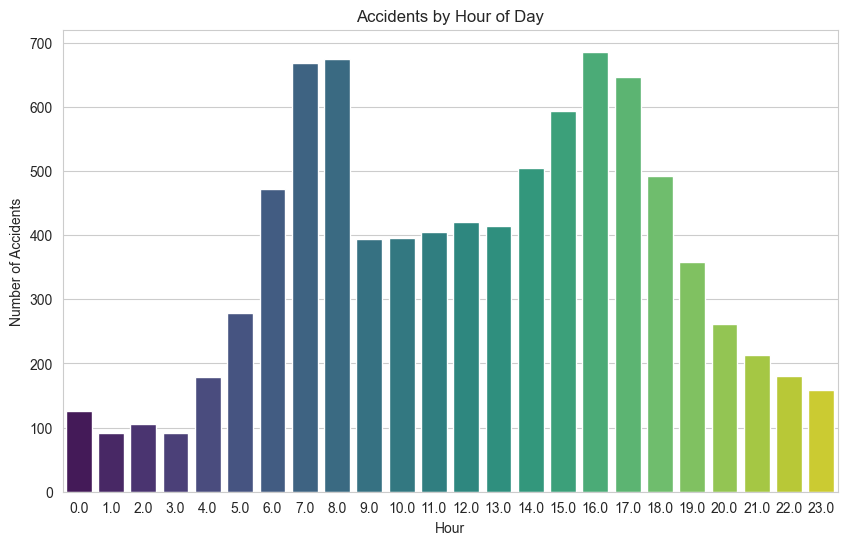

In [2]:
# Accidents by Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.savefig('../images/accidents_by_hour.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\1979254976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


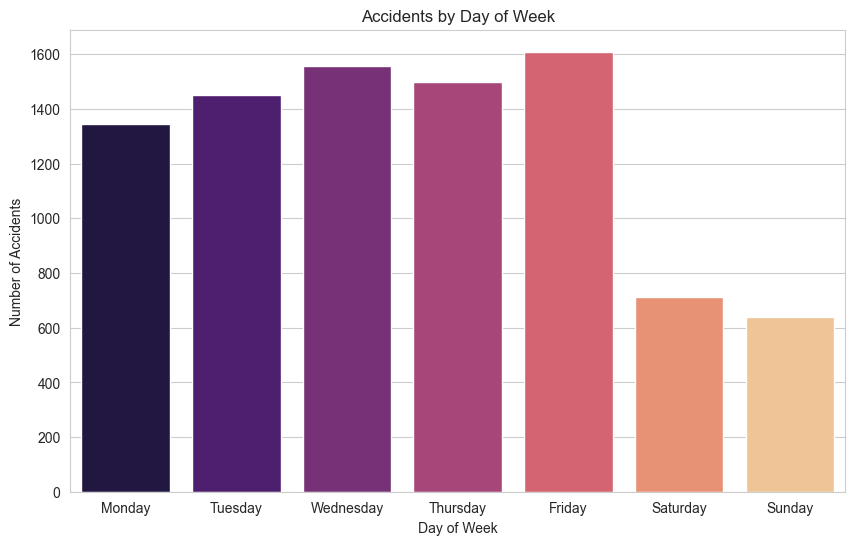

In [3]:
# Accidents by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.savefig('../images/accidents_by_day.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\1261996307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='coolwarm', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


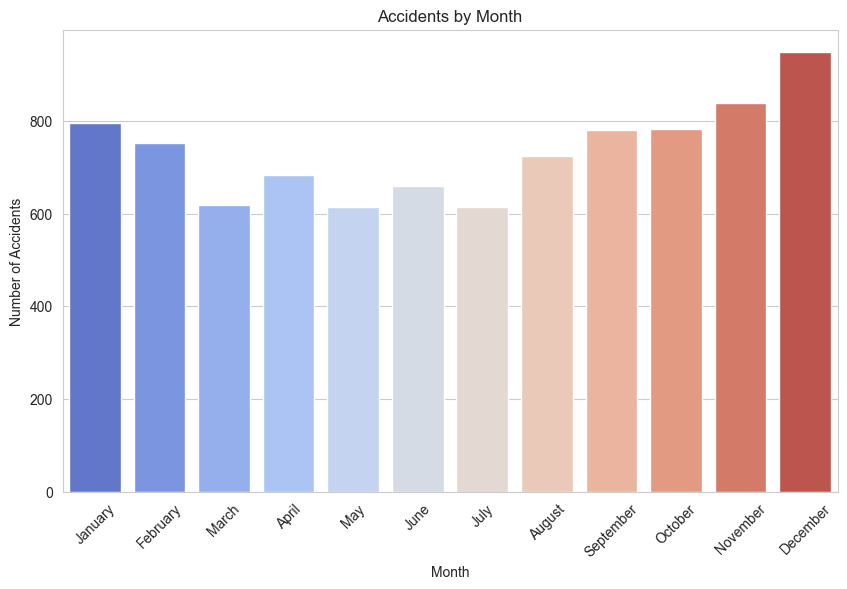

In [4]:
# Accidents by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='coolwarm', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.savefig('../images/accidents_by_month.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\3672633110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df, palette='Blues_d', order=df['Weather_Condition'].value_counts().index)


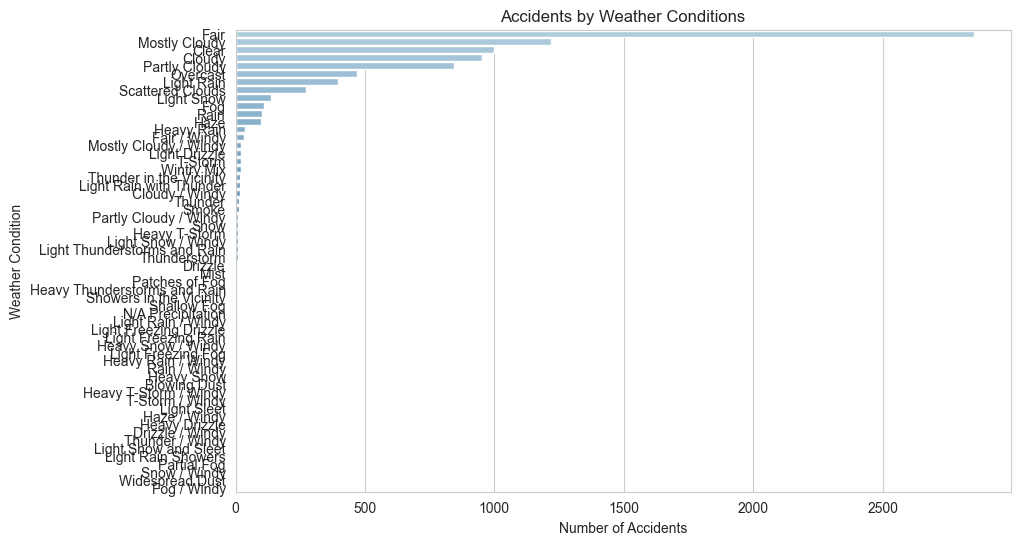

In [5]:
# Accidents by Weather
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Condition', data=df, palette='Blues_d', order=df['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.savefig('../images/accidents_by_weather.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\1480438725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Road_Condition', data=df, palette='Reds_d', order=df['Road_Condition'].value_counts().index)


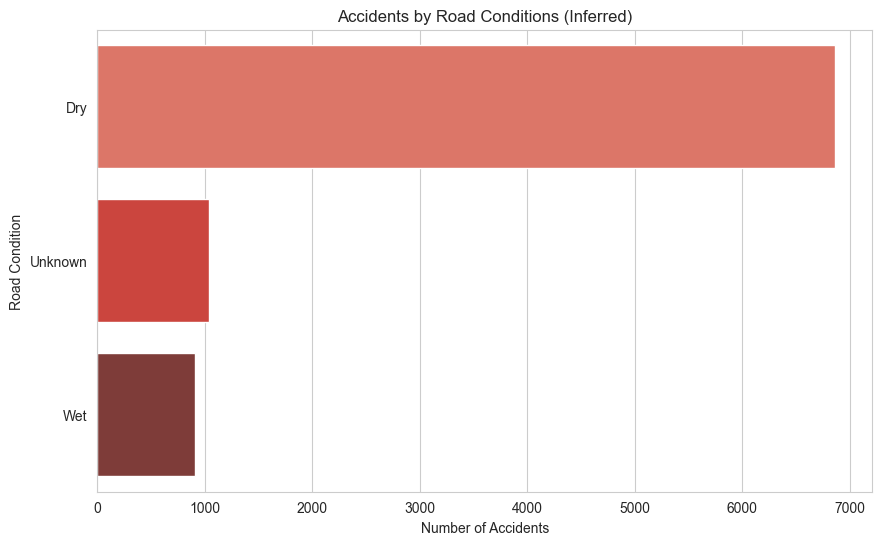

In [6]:
# Accidents by Road Conditions (inferred)
plt.figure(figsize=(10, 6))
sns.countplot(y='Road_Condition', data=df, palette='Reds_d', order=df['Road_Condition'].value_counts().index)
plt.title('Accidents by Road Conditions (Inferred)')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
plt.savefig('../images/accidents_by_road.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\3084392258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Light_Condition', data=df, palette='Greens_d', order=df['Light_Condition'].value_counts().index)


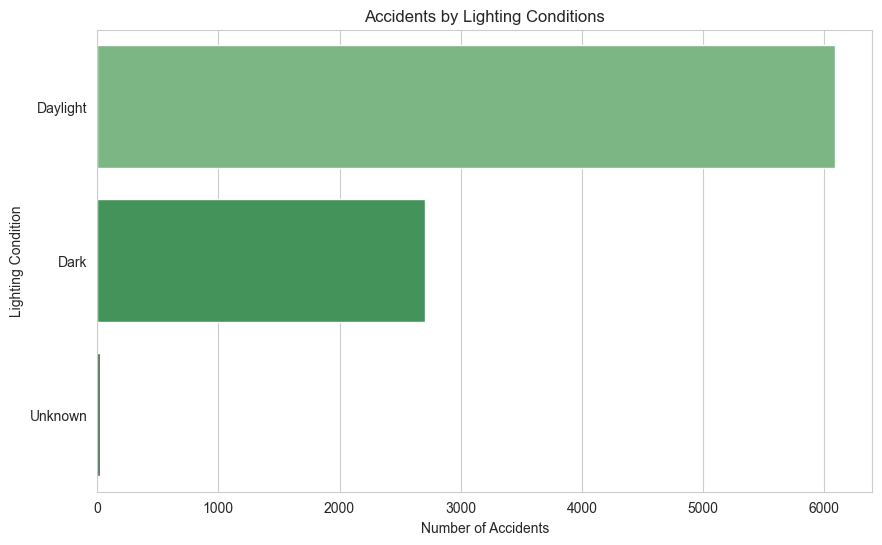

In [7]:
# Accidents by Lighting
plt.figure(figsize=(10, 6))
sns.countplot(y='Light_Condition', data=df, palette='Greens_d', order=df['Light_Condition'].value_counts().index)
plt.title('Accidents by Lighting Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Lighting Condition')
plt.savefig('../images/accidents_by_lighting.png')
plt.show()

In [8]:
# Hotspot Heatmap (Folium)
map_us = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)
heat_data = [[row['Start_Lat'], row['Start_Lng']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(map_us)
map_us.save('../images/accident_hotspots_folium.html')
print("Folium heatmap saved to images/accident_hotspots_folium.html")

Folium heatmap saved to images/accident_hotspots_folium.html


In [9]:
# Hotspot Scatter Map (Plotly)
fig = px.scatter_mapbox(
    df,
    lat='Start_Lat',
    lon='Start_Lng',
    color='Severity',
    size_max=15,
    zoom=4,
    mapbox_style='open-street-map',
    title='Accident Hotspots by Severity'
)
fig.update_layout(margin={'r':0, 't':50, 'l':0, 'b':0})
fig.update_traces(marker={'size': 8})
fig.write_html('../images/accident_hotspots_plotly.html')
print("Plotly scatter map saved to images/accident_hotspots_plotly.html")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23228\638834696.py:2: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


Plotly scatter map saved to images/accident_hotspots_plotly.html


## Step 3: Observations from Visualizations
- **Time Patterns**: Peaks in rush hours (e.g., 7–9 AM, 4–6 PM) and on weekdays.
- **Weather**: Most accidents occur in clear weather, but severity may increase in adverse conditions.
- **Road Conditions**: Inferred dry roads have more accidents; wet roads may correlate with severity.
- **Lighting**: More accidents in daylight, but dark conditions may lead to more severe outcomes.
- **Hotspots**: Clusters in urban areas (visible in maps).

# Insights
## Step 1: Load Data
- Load cleaned dataset for analysis (~9,995 rows).

In [10]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('../data/usa_traffic_accidents_cleaned.csv')

## Step 2: Contributing Factors
- Analyze severity by weather, road conditions (inferred), lighting, and time.

In [11]:
# Severity by Weather
print("Severity by Weather:")
print(pd.crosstab(df['Weather_Condition'], df['Severity']))

Severity by Weather:
Severity                       1     2    3   4
Weather_Condition                              
Blowing Dust                   0     1    0   0
Clear                          0   659  302  37
Cloudy                         6   774  134  39
Cloudy / Windy                 0    16    0   0
Drizzle                        0     5    2   0
Drizzle / Windy                0     1    0   0
Fair                          41  2360  367  83
Fair / Windy                   0    29    2   2
Fog                            1    93   15   2
Fog / Windy                    0     1    0   0
Haze                           0    83   14   1
Haze / Windy                   0     1    0   0
Heavy Drizzle                  0     0    1   0
Heavy Rain                     0    29    8   0
Heavy Rain / Windy             0     1    1   0
Heavy Snow                     0     2    0   0
Heavy Snow / Windy             0     1    0   1
Heavy T-Storm                  0     8    3   0
Heavy T-Storm / Win

In [12]:
# Severity by Road Condition (inferred)
print("Severity by Road Condition:")
print(pd.crosstab(df['Road_Condition'], df['Severity']))

Severity by Road Condition:
Severity         1     2     3    4
Road_Condition                     
Dry             59  5399  1198  210
Unknown          3   719   288   26
Wet              4   683   198   25


In [13]:
# Severity by Hour
print("Severity by Hour:")
print(pd.crosstab(df['Hour'], df['Severity']))

Severity by Hour:
Severity   1    2    3   4
Hour                      
0.0        0  102   14  10
1.0        0   74   11   6
2.0        2   84   13   6
3.0        2   73   14   2
4.0        1  143   30   5
5.0        5  211   50  13
6.0        7  356   94  15
7.0        9  526  122  12
8.0       10  516  137  12
9.0        0  305   82   7
10.0       2  314   72   8
11.0       1  297   93  14
12.0       3  323   75  19
13.0       3  328   71  13
14.0       2  390   98  14
15.0       1  480   99  14
16.0       3  526  135  22
17.0       3  475  154  14
18.0       5  388   90   9
19.0       3  265   76  14
20.0       2  193   63   4
21.0       0  160   40  13
22.0       1  143   32   5
23.0       1  129   19  10


## Step 3: Key Insights
- **Time Patterns**:
  - Accidents peak during rush hours (e.g., 7–9 AM, 4–6 PM).
  - Weekdays (e.g., Friday) have more accidents; weekends may show higher severity.
- **Weather**:
  - Clear weather dominates; rain/snow increases severity.
- **Road Conditions**:
  - Inferred dry roads (from clear/cloudy weather) have more accidents; wet roads (from rain/snow) correlate with severe outcomes.
- **Lighting**:
  - Daylight has more accidents; darkness increases severity.
- **Hotspots**:
  - Clusters in urban areas (visible in maps), likely near intersections.
- **Recommendations**:
  - Enhance safety during rush hours with traffic calming measures.
  - Improve road conditions in adverse weather (e.g., better drainage for wet roads).
  - Increase lighting in high-risk areas at night.
  - Target patrols in hotspot areas identified in maps.